# Feature transformation or analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = load_iris()
X = data.data
y = data.target

print (X.shape, y.shape)

(150, 4) (150,)


In [84]:
data = pd.read_csv("fruits_data_ext.csv")
X = data.iloc[:, 4:8]
y = data.iloc[:, 1]

print (X.shape, y.shape)

(177, 4) (177,)


In [93]:
# covs = np.corrcoef(X)
covs = np.cov(X)
print (covs.max(), covs.min())

7.9625 1.4733333333333332


In [38]:
## Add some noisy data to degrade features
random_features = np.random.RandomState(1000).uniform(0, 0.5, size=( len(X) , 20))
X = np.hstack((X, random_features))
print (X.shape, y.shape)

(177, 24) (177,)


In [3]:
# Normalize data to 0-1
# X = MinMaxScaler().fit_transform(X)
X = StandardScaler().fit_transform(X)

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [8]:
# Create and train classifier
clf = SVC(kernel='sigmoid')
clf.fit (X_train, y_train)

SVC(kernel='sigmoid')

Acc: 0.833


<Axes: >

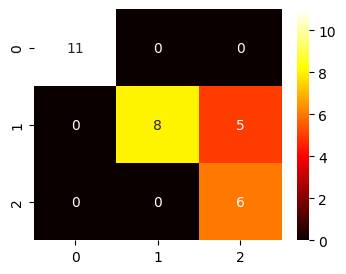

In [10]:
# Estimate predictions and compute some metrics

predictions = clf.predict (X_test)

# Print results
acc = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print ("Acc: {0:.3f}".format(acc))
_, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='hot', ax=ax)

### Principal Component Analysis (PCA) -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components = 2, random_state=1) #

pca.fit(X_train)

# Create reduced versions of subset
trans_train = pca.transform(X_train)
trans_test  = pca.transform(X_test)

In [111]:
print (trans_train.shape, trans_test.shape)
print (pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

(120, 2) (30, 2)
[0.72930408 0.23213204] 0.9614361221510124


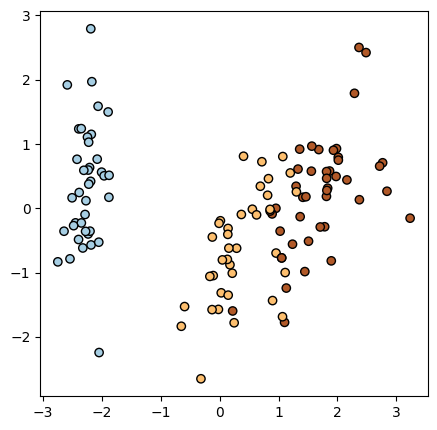

In [112]:
# Plot transformed points
_, ax = plt.subplots(figsize=(5,5))
ax.scatter(trans_train[:, 0], trans_train[:, 1], c=y_train, cmap='Paired', edgecolors='k')

In [114]:
# Classify PCA features and compute predictions
clf = SVC(kernel="rbf", gamma=0.005)
clf.fit(trans_train, y_train)

SVC(gamma=0.005)

In [115]:
# Comput metrics
predictions = clf.predict(trans_test)

acc_trans = accuracy_score(y_test, predictions)
cm_trans = confusion_matrix(y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc , acc_trans ))

For PCA
Accuracy before: 0.800, - Now : 0.767 



### Kernel PCA -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)


In [12]:
from sklearn.decomposition import KernelPCA

In [17]:
kpca = KernelPCA(n_components = 3, kernel="rbf", gamma=0.5)

kpca.fit (X_train)

# Create reduced versions of subset
trans_train = kpca.transform(X_train)
trans_test = kpca.transform(X_test)

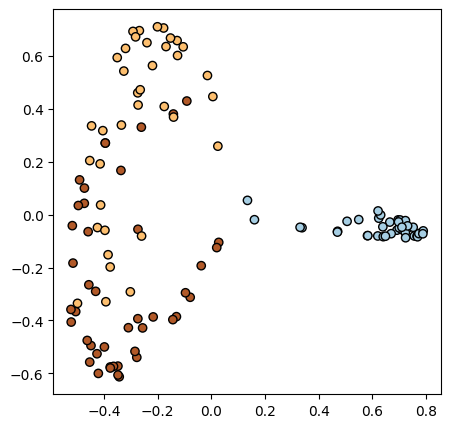

In [14]:
# Plot transformed points
_, ax = plt.subplots(figsize=(5,5))
ax.scatter(trans_train[:, 0], trans_train[:, 1], c=y_train, cmap='Paired', edgecolors='k')

In [18]:
# Classify kernel PCA features and compute predictions
clf = SVC(kernel='sigmoid')
clf.fit(trans_train, y_train)

SVC(kernel='sigmoid')

In [19]:
# Comput metrics
predictions = clf.predict(trans_test)

acc_trans = accuracy_score(y_test, predictions)
cm_trans = confusion_matrix(y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc , acc_trans ))

For PCA
Accuracy before: 0.833, - Now : 0.800 



In [ ]:
# Comput metrics

# Compare against original model
print("For Kernel PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( _ , _ ))
